# House Prices Exploratory Data Analysis
Dataset available here :- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

In [120]:
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

In [121]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [122]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [123]:
train_data.drop("Id", axis=1, inplace=True)
test_data.drop("Id", axis=1, inplace=True)

In [124]:
train_data.shape, test_data.shape

((1460, 80), (1459, 79))

In [125]:
categorical = train_data.select_dtypes(["object"]).columns

In [126]:
numerical = train_data.select_dtypes(["float64", "int64"]).columns

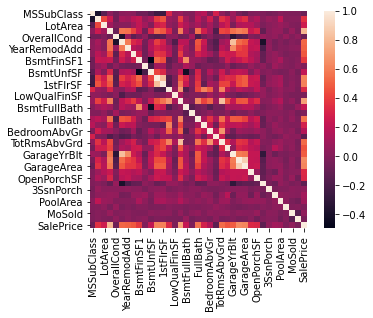

In [127]:
#Correlation matrix for all features
corr = train_data.corr()

sns.heatmap(corr, square=True)

In [128]:
indx = corr.nlargest(10, "SalePrice")["SalePrice"].index

In [129]:
indx

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [130]:
# Correlation of 10 largest numerical features
corr1 = train_data[numerical][indx].corr()

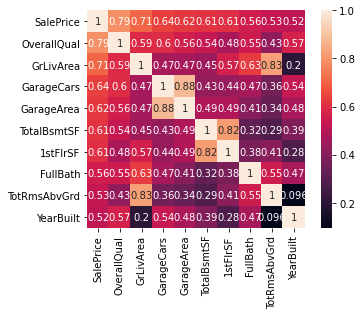

In [131]:
sns.heatmap(corr1, annot=True, square=True)
plt.show()

In [132]:
# Finding out features which have maximum correlation with SalePrice in descending order
indx = indx[1:]

In [133]:
indx

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

## Relationship with categorical variables

In [134]:
# Exploring the feature which has max correlation
feature = "OverallQual"
df = pd.concat([train_data["SalePrice"], train_data[feature]], axis=1)

In [135]:
df.head()

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


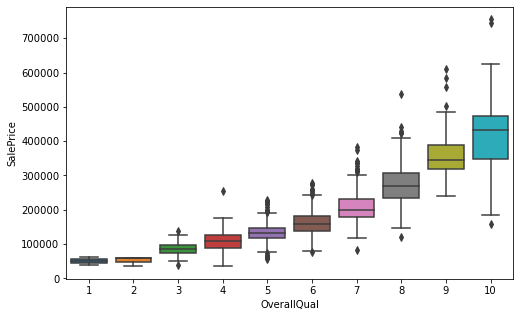

In [136]:
# Categorical (Ordinal)
# We can see a gradual upward trend as expected with increasing OverallQual of the house, the 50th %ile SalePrice is increasing
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="OverallQual", y= "SalePrice")
plt.show()

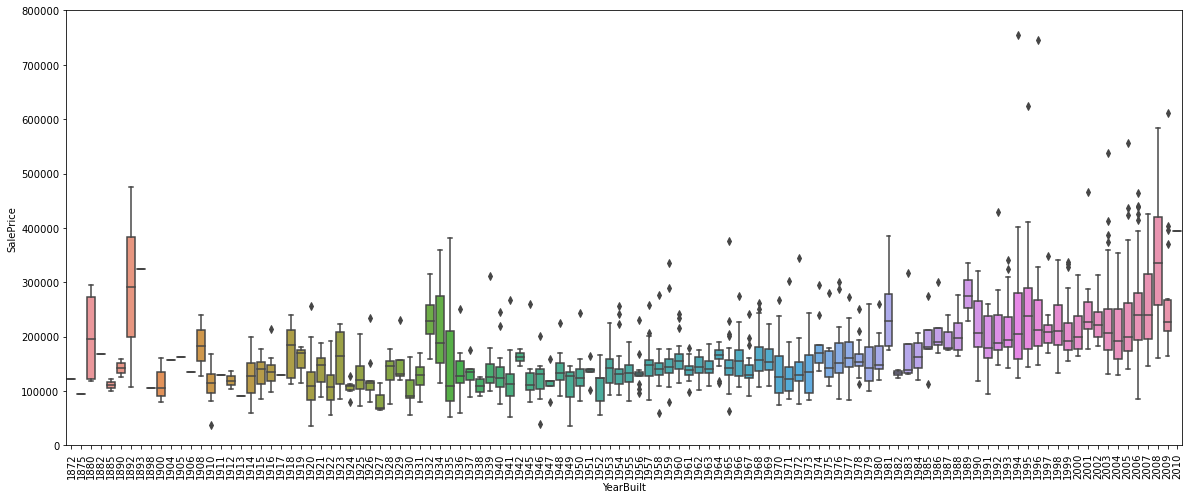

In [137]:
data = pd.concat([train_data['SalePrice'], train_data['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#'SalePrice' is more prone to spend more money in new stuff than in old even though the relationship is not that strong

## Relationship with numerical variables

In [138]:
# Numerical Continuous
# Exploring the Stats for second largest correlated feature (Above Ground living area)
train_data["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

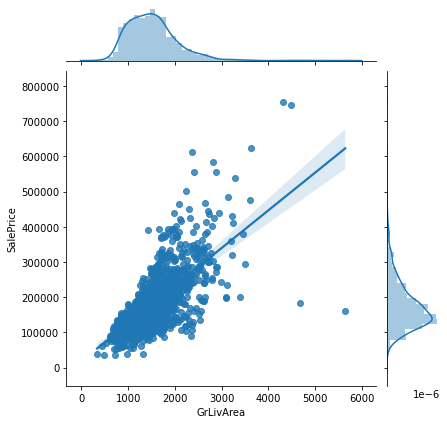

In [139]:
# We see a linear trend in SalePrice with Above area
sns.jointplot(x=train_data["GrLivArea"], y=train_data["SalePrice"], kind="reg")
plt.show()

In [140]:
# Finding and removing outliers based on the above plot
ix = train_data[(train_data["GrLivArea"] > 4300) & (train_data["SalePrice"] < 220000)].index

In [141]:
ix

Int64Index([523, 1298], dtype='int64')

In [142]:
train_data = train_data.drop(ix)

In [143]:
train_data = train_data.reset_index(drop=True)

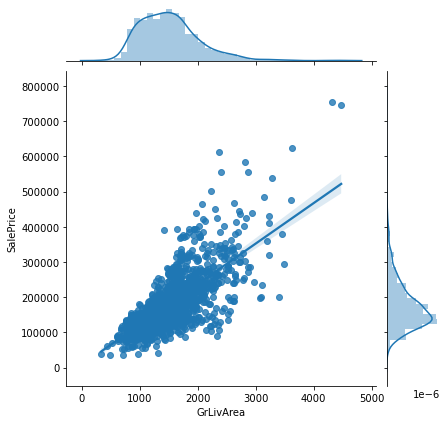

In [144]:
# Cleaned Points which stay true to the nature of the curve
sns.jointplot(x=train_data["GrLivArea"], y=train_data["SalePrice"], kind="reg")
plt.show()

In [145]:
# Numerical Discrete
# Exploring the third largest correlated feature (count of Cars that can fit in house's Garage)
train_data["GarageCars"].describe()

count    1458.000000
mean        1.766118
std         0.747104
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

In [146]:
train_data["GarageCars"].unique()

array([2, 3, 1, 0, 4])

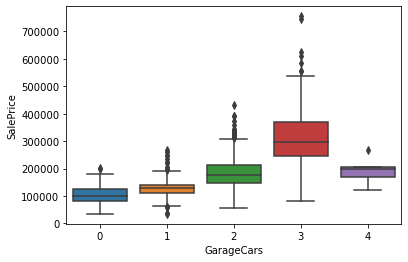

In [147]:
# Analysing the box plot for GarageCars and Sales Price
# We see few outlier points that don't follow the trend
sns.boxplot(x=train_data["GarageCars"], y= train_data["SalePrice"])
plt.show()

In [148]:
# Finding out outliers
ix = train_data[(train_data["GarageCars"] > 3) & (train_data["SalePrice"] < 300000)].index

In [149]:
ix

Int64Index([420, 746, 1189, 1338, 1348], dtype='int64')

In [150]:
# Removing outliers
train_data = train_data.drop(ix).reset_index(drop=True)

In [151]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


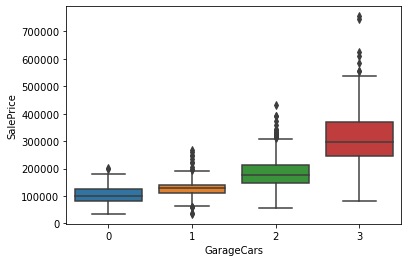

In [152]:
# Cleaner Boxplot
sns.boxplot(x=train_data["GarageCars"], y= train_data["SalePrice"])
plt.show()

In [153]:
train_data.isnull().head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


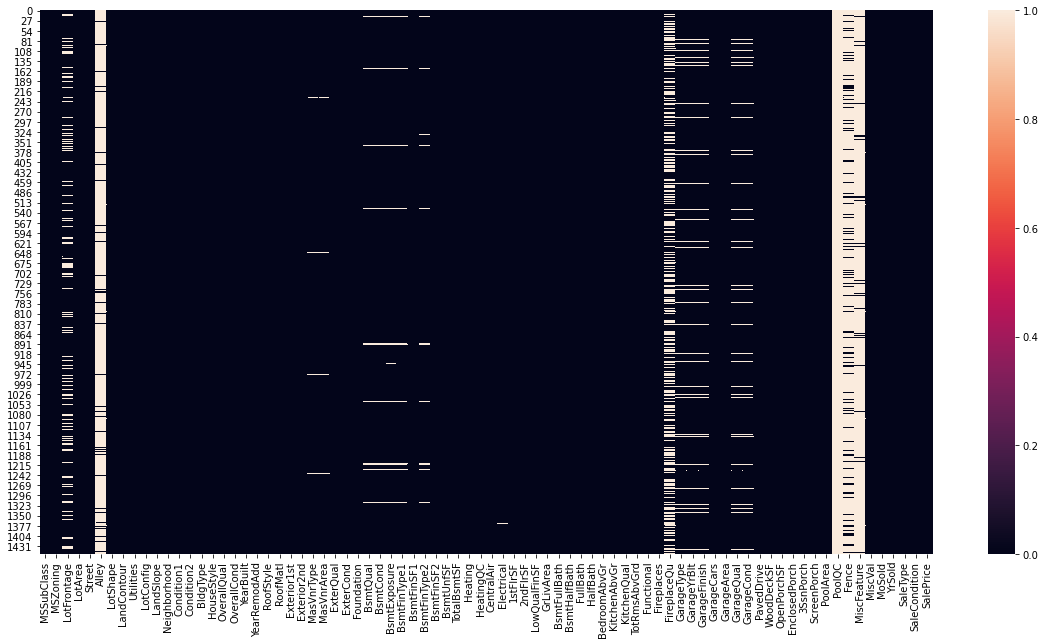

In [154]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_data.isnull(), xticklabels=train_data.columns)
plt.show()

In [155]:
train_data.info()
# Finding out that Alley is one of the features having maximum Null Values. However, on inspection from the data_description.txt, we find that Alley like many other features has NA meaning as No Alley([Feature_name])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1453 non-null   int64  
 1   MSZoning       1453 non-null   object 
 2   LotFrontage    1195 non-null   float64
 3   LotArea        1453 non-null   int64  
 4   Street         1453 non-null   object 
 5   Alley          90 non-null     object 
 6   LotShape       1453 non-null   object 
 7   LandContour    1453 non-null   object 
 8   Utilities      1453 non-null   object 
 9   LotConfig      1453 non-null   object 
 10  LandSlope      1453 non-null   object 
 11  Neighborhood   1453 non-null   object 
 12  Condition1     1453 non-null   object 
 13  Condition2     1453 non-null   object 
 14  BldgType       1453 non-null   object 
 15  HouseStyle     1453 non-null   object 
 16  OverallQual    1453 non-null   int64  
 17  OverallCond    1453 non-null   int64  
 18  YearBuil

In [156]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil